# <center> <font>PCA</font>
## <center>Explicação de artigo que implementa _Principal Component Analysis_
### <center>**Disciplina:**<br>
<center>Tópicos Especiais em Processamento de sinais: Fusão e modelamento de sinais (ELE-405)<br>
### <center>**Alunos:**<br>
<center>Carlos Felipe Emygdio de Melo - 00300848
<center>Tulio Dapper e Silva - 00194878
<center>Guilherme Severo Zandomeneghi - 00278481<br>
### <center>Professores:<br>
<center>Valner João Brusamarello
<center>Diego Eckhard<br><br><br><br><br>
<br><br><br><br><br>
<center>**Universidade Federal do Rio Grande do Sul-UFRGS-PPGEE**
<center>**Porto Alegre-RS**
<center>**03/04/2018**


# <font color=Blue>1. PCA</font>
>### **Nesse tópico faremos uma breve introdução sobre PCA, quando usá-lo e seu funcionamento.**<br>
>## <font color=Blue>1.1. O que é PCA (Principal Component Analysis)?</font>
>>* É uma técnica de "Dimensionality Reduction" do espaço de features (redução de dimensão).<br>
<div class="alert alert-info">
    Eu conheço a relação entre as variáveis? <br>
    Eu possuo muitas variáveis a ponto de "complicar" o modelo em desenvolvimento para os "dados" (overfitting model)? <br>
    Eu estou violando hipóteses do modelo devido ao grande número de variáveis? <br>
    Como eu poderia pegar todas as "variáveis" e analisar apenas as mais representativas?    
    </div><br>
>* É uma técnica de "Feature Extraction" (extração de características).<br>
<div class="alert alert-info">
    É uma técnica de "transformação linear". <br>
    Criam-se novas "variáveis" independentes que são a "combinação" das variáveis antigas. <br>
    Ordenamos as novas variáveis de acordo com o quão bem elas representam nossa variável dependente. <br>
    Podemos criar quantas novas variáveis independentes desejarmos, e descartamos as "menos importantes".
    </div>
    
>## <font color=Blue>1.2. Quando usar PCA?</font>
>>* Se voce responder "sim" para as 3 perguntas abaixo, então PCA é uma técnica adequada.<br>
<div class="alert alert-info">
    Você quer reduzir o número de variáveis mas não consegue identificar quais as menos importantes? <br>
    Voce quer garantir que suas variáveis são independentes? <br>
    Você se sente confortável em fazer com que suas variáveis independentes sejam "transformadas" (mais dificilmente interpretadas)?
    </div>
    
>## <font color=Blue>1.3. Como PCA funciona?</font>
>>* Teoria | Matrizes | Autovetores | Autovalores | Componentes Principais | <br><br>    
* Resumo do PCA<br>
<div class="alert alert-info">
    Avalia o quanto uma variável é associada a outra (Matriz de Covariância). <br>
    Avalia a direção em que os dados estão dispostos (Autovetores). <br>
    Avalia a magnitude (importância relativa) das diferentes direções (Autovalores). <br>
    </div>
    
>## <font color=Blue>1.4. Quantas variáveis (componentes principais) manter e quantas descartar?</font>
>>* Existem três métodos para determinar isso, ilustrados abaixo:<br>
<div class="alert alert-info">
    Método 1: <br>
    Selecionamos arbitrariamente quantas dimensões (features) queremos manter. <br>
    E.g. Quero representar em 2D, logo mantenho apenas 2 features.</div>    
    <div class="alert alert-info">Método 2: <br>
    Calculamos a "proporção da variância" de cada feature. <br>
    Estabelecemos um threshold, e adicionamos features até alcançá-lo. <br>
    E.g. Se desejo que 80% de toda a variabilidade seja explicada pelo modelo, adiciono features até atingir esse patamar.</div>  
    <div class="alert alert-info">Método 3: <br>
    Calculamos a "proporção da variância" de cada feature. <br>
    Ordenamos as features por importância na proporção da variância. <br>
    Plota-se um gráfico denominado "Scree Plot", ou seja, a proporção da variância acumulada com a adição do número de features. <br>
    Adicionam-se features até identificar o ponto que a adição de uma nova feature cause um incremento muito pequeno em relação a feature anterior. (Find the Elbow, procure o cotovelo no plot)</div>

# <font color=Blue>2. Apresentando o Artigo</font>
>### **Nesse tópico, faremos uma breve introdução ao artigo:<br><br>M. Ou, S. Liang, R. Zhang and Q. Xiong, "Evaluation of water quality for the Beibu Gulf and Zhenzhu Bay by principal component analysis," 2017 International Conference on Advanced Mechatronic Systems (ICAMechS), Xiamen, China, 2017, pp. 324-328.**<br>
>## <font color=Blue>2.1. Tema do Artigo:</font>
>>O artigo estudado busca explicar o relacionamento entre a qualidade da água e o ecossistema de mangues presente no Golfo de Beibu e Baía de Zhenzhu na China.<br>

>## <font color=Blue>2.2. O Estudo:</font>
>>Foram realizadas 22 amostras de estações de água espalhadas pelo Golfo de Beibu e Baía de Zhenzhu. Estas amostras foram examinadas levando-se em consideração 14 parâmetros, que estão listados abaixo:<br>
>>> 
- PH (unidade padrão);
- Salinidade;
- DO(mg/L) <font color=red>_Oxigênio dissolvido em água_</font>;
- CDO(mg/L);
- Fosfato(mg/L);
- Nitrogênio Inorgânico(mg/L);
- Petróleo Cru(mg/L);
- Clorofila-$\alpha$($\mu$g/L);
- Cu($\mu$g/L);
- Pb($\mu$g/L);
- As($\mu$g/L);
- Nitrogênio, Total(mg/L);
- Fósforo, Total(mg/L);
- Nitrogenio Amonical(mg/L);




# 3. Implementação do PCA
>## A seguir, implementaremos o algoritmo de PCA usando os dados provenientes do artigo introduzido acima.

Representatividade acumulada de 4 primeiras PC's = 88.043%


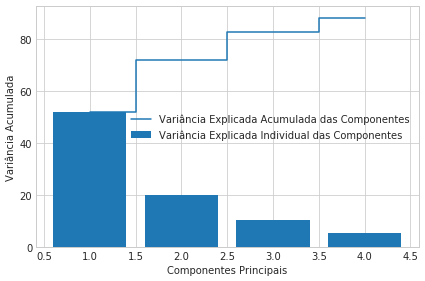

In [16]:
import numpy as np
from numpy import linalg as LA
import math
from matplotlib import pyplot as plt

#começamos inicializando nossa matrix com 14 variáveis e 22 amostras
X = np.matrix('7.167 7.317 7.557 8.007 8.053 8.11 8.067 8.11 8.32 8.053 8.083 8.1 8.193 8.133 8.067 7.763 7.963 7.983 7.95 8.037 7.927 7.99; ' 
              '5.525 6.267 11.637 19.731 21.965 24.515 24.437 22.749 17.256 23.964 25.792 28.043 26.22 26.561 26.134 18.361 23.179 24.562 17.354 20.502 23.359 25.753;'
              '1.913 1.87 1.49 1.73 1.343 1.59 1.8 1.717 0 1.957 2.15 2.353 1.34 1.147 2.113 1.813 2.217 2.213 1.073 1.927 2.43 2.353;'
              '1.58 1.707 1.507 1.447 1.297 1.207 1.767 1.443 3.093 1.347 1.127 0.973 1.323 1.247 1.093 1.39 1.183 1.217 1.53 1.463 1.327 1.18;'
              '0.024 0.03 0.019 0.013 0.012 0.009 0.009 0.012 0.012 0.01 0.009 0.008 0.007 0.007 0.008 0.012 0.009 0.009 0.011 0.009 0.01 0.009;'
              '0.952 0.809 0.936 0.387 0.264 0.214 0.21 0.226 0.263 0.17 0.149 0.105 0.222 0.135 0.131 0.239 0.19 0.193 0.252 0.171 0.197 0.156;'
              '0.05 0.075 0.058 0.05 0.039 0.048 0.034 0.049 0.088 0.05 0.031 0.03 0.053 0.047 0.038 0.042 0.041 0.031 0.04 0.066 0.053 0.05;'
              '8.517 7.89 8.353 10.293 9.983 9.217 9.59 12.633 12.033 4.033 4.24 3.717 15.03 11.027 3.067 8.23 4.513 3.573 5.087 10.03 4.243 3.963;'
              '0.75 1.73 1.933 2.423 1.347 1.693 2.087 1.77 2.223 3.91 2.443 3.24 2.38 2.403 2.867 2.58 2.227 1.263 1.287 1.273 3.67 1.63;'
              '0.693 0.93 1.953 2.12 0.617 1.06 1.807 1.057 1.04 3.623 2.31 2.103 1.767 2.263 1.917 1.12 2.187 2.667 1.543 0.56 2.387 1.01;'
              '0.461 0.484 0.628 0.96 1.01 1.15 1.153 1.153 0.983 0.967 0.98 1.036 1.39 1.347 1.277 0.897 1.11 1.153 0.855 0.92 1.041 1.21;'
              '1.08 1.096 0.866 0.49 0.534 0.313 0.311 0.341 0.586 0.348 0.267 0.223 0.319 0.265 0.267 0.461 0.343 0.337 0.395 0.352 0.344 0.345;'
              '0.065 0.066 0.055 0.042 0.033 0.03 0.045 0.04 0.068 0.053 0.044 0.04 0.083 0.042 0.036 0.045 0.037 0.043 0.048 0.045 0.053 0.052;'
              '0.186 0.288 0.259 0.194 0.131 0.129 0.115 0.11 0.147 0.06 0.058 0.051 0.168 0.093 0.055 0.085 0.073 0.083 0.079 0.058 0.069 0.062')


samples = 22
num_variables = 14

#Após ter gerado a Matrix X, a centralizamos subtraindo a média dos seus respectivos valores
#Obs:como nossas variáveis são linhas, então tiramos da linha e depois subtraimos cada valor da linha pela sua média
# Média
for i in range(0, (num_variables)):
    X[i,:] = X[i,:] - np.mean(X[i,:])
    
#Após centralizada, como nossos dados possuem dimensões diferentes,vamos normalizá-los, dividindo cada termo pelo, já sem a média,
# pelo o desvio padrão
#desvio padrão
for i in range(0, num_variables):
    a=0
    for j in range(0, samples):
        a = a + X[i,j]**2
    # computa o desvio padrão
    S = (a/(samples-1))**0.5
    # divide cada termo da linha pelo desvio padrão respectivo
    X[i,:] = X[i,:]/S

#Após a normalização da matrix X, calculamos a sua Matrix de covariância, multiplicando a Matrix X pelo sua Transposta e divindo
# o resultado por o número de amostras menos 1 (n-1)
# Obs: como os dados foram normalizados, esse é a nossa matrix de correlação
#Matriz de Covariância
Cx = (float(1/(samples-1)))*X*np.transpose(X)

#Calculamos agora os Autovetores e Autovalores da Matrix Cx, onde eValues são os AutoValores e eVectors são os Autovetores 
eValues, eVectors = LA.eig(Cx)
#print(eValues,eVectors)

#Calculamos então a variância Total dos nossos dados que é a soma dos autovalores
totalVariance = np.sum(eValues)

#Após o calculo da variância total, vamos calcular o da representatividade de cada Componente Principal
eValuesVariance = np.zeros(eValues.size)
for i in range(0,num_variables):
    eValuesVariance[i]  = eValues[i]/totalVariance*100
#print(eValuesVariance)

#Variância Acumulada das 4 primeiras componentes principais
    cum_var_exp = np.cumsum(eValuesVariance[0:4])
        
#Eixo das abscissas
X = np.matrix('1 2 3 4')

#Tendo como base o artigo de estudo, foram selecionadas as 4 PC mais significativas, sendo que eleas representam:
print("Representatividade acumulada de 4 primeiras PC's = " + str(round(np.sum(eValuesVariance[0:4]), 3)) + "%")

#Individual Explained Variance & Cumulative Explained Variance
with plt.style.context('seaborn-whitegrid'):
   
    plt.bar(x, eValuesVariance[0:4], alpha=1, align='center',
            label='Variância Explicada Individual das Componentes')
    plt.step(x, cum_var_exp, where='mid',
             label='Variância Explicada Acumulada das Componentes')
    plt.ylabel('Variância Acumulada')
    plt.xlabel('Componentes Principais')
    plt.legend(loc='best')
    plt.tight_layout()
  

# 4. Conclusões:

O PCA é um método estatístico multivariável que identifica as componentes mais importantes ou os fatores que apresentam maior variância em um sistema complexo. <br>

Esse método pode ser utilizado com o objetivo de reduzir o número de variáveis em uma quantidade menor de índices e preservar as relações presentes nos dados originais. <br>

Neste artigo, é realizado um estudo na qualidade da água de manguezais em diferentes estações de coleta de água ao longo da costa da China. Neste contexto, o método pode servir como uma maneira de priorização de quais locais devem receber investimento na melhoria da qualidade da água, quando se tem recursos limitados. <br>

A partir dos estudos, os autores destacaram que a qualidade da água é inferior em estações mais próximas da terra. Ainda, foi possível ordernar as estações em função da qualidade da água.

# 5. Referências: 
 - SHLENS, JONATHON. A Tutorial on Principal Component Analysis. 3. ed. San Diego CA: Google Research, 2004. Disponível em: <https://web.cs.hacettepe.edu.tr/~aykut/classes/spring2013/bil682/supplemental/pca_schlens.pdf>. Acesso em: 31  mar.  2018;
 - M. Ou, S. Liang, R. Zhang and Q. Xiong, "Evaluation of water quality for the Beibu Gulf and Zhenzhu Bay by principal component analysis," 2017 International Conference on Advanced Mechatronic Systems (ICAMechS), Xiamen, China, 2017, pp. 324-328;
 - QUEKOVICH. PCA: intro. Disponível em: <https://www.youtube.com/watch?v=NWldkpR2sGA>. Acesso em: 31  mar.  2018;
 - QUEKOVICH. PCA: example - Steps 1 & 2. Disponível em: <https://www.youtube.com/watch?v=Ao_iYZ50RNY&t=559s>. Acesso em: 31  mar.  2018;
 - QUEKOVICH. PCA: example - Steps 3 & 4. Disponível em: <https://www.youtube.com/watch?v=kn_rLM1ZS2Q>. Acesso em: 31  mar.  2018;
 - QUEKOVICH. PCA: example - Step 5. Disponível em: <https://www.youtube.com/watch?v=95olriw7_N4&t=3s>. Acesso em: 31  mar.  2018;
 - PRATI, RONALDO. Análise de componentes principais (PCA). [s.l.: s.n., s.d.]. Disponível em: <http://professor.ufabc.edu.br/~ronaldo.prati/DataMining/PCA.pdf>. Acesso em: 31  mar.  2018;
 - LIMA, CARLOS, TAPADAS, NÁDIAMASSON, SABRINA. O que é o PCA - Principal Component Analysis e como aplicá-lo a um conjunto de dados - BI4ALL | Creating Business Intelligence. BI4ALL | Creating Business Intelligence. Disponível em: <http://www.bi4all.pt/noticias/blog/o-que-e-o-pca-principal-component-analysis-e-como-aplica-lo-a-um-conjunto-de-dados/>. Acesso em: 29  mar.  2018;
 - Stupp de Marchi, E. (2018). Mundo: Clima e Correntes Marítimas - Disciplina - Geografia. [online] Geografia.seed.pr.gov.br. Available at: http://www.geografia.seed.pr.gov.br/modules/galeria/detalhe.php?foto=405&evento=5 [Accessed 29 Mar. 2018];
 - G1 Mundo. (2018). Acidente na China despeja 1,5 mil toneladas de óleo no mar. [online] Available at: http://g1.globo.com/mundo/noticia/2010/07/acidente-na-china-despeja-15-mil-toneladas-de-oleo-no-mar.html [Accessed 29 Mar. 2018];
 

In [ ]:
#Individual Explained variance    
plt.bar(x, eValuesVariance[0:4], align='center', alpha=0.5)
#plt.plot(eValuesVariance[0:4])
plt.xlabel('Componentes Principais')
plt.ylabel('Variância Explicada Individual das Componentes')
plt.show()   
    
#Cumulative Explained variance (Scree Plot)
plt.plot(x, cum_var_exp)
plt.xlabel('Componentes Principais')
plt.ylabel('Variância Explicada Acumulada das Componentes')
plt.show()